# Singular value decomposition - image compression

The matrices U, D and V can be found by 
- transforming A in a __square__ matrix and 
- by computing the eigenvectors of this square matrix. 

The square matrix can be obtain by multiplying the matrix A by its transpose in one way or the other:

U corresponds to the eigenvectors of $AA^T$

V corresponds to the eigenvectors of $A^TA$

D corresponds to the eigenvalues $AA^T$ or $A^TA$ which are the same.

In [4]:
import numpy as np

The singular value decomposition can be done with the __linalg.svd()__ function from Numpy 

In [5]:
A = np.array([[7, 2], 
              [3, 4], 
              [5, 3]])

In [6]:
A.shape

(3, 2)

In [7]:
U, D, V = np.linalg.svd(A)

#### Left singular vectors of A:

Eigenvectors of $AA^T$

In [8]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [9]:
# should match with U
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

#### The nonzero singular values

The nonzero singular values of A are the square roots of the eigenvalues of ATA and AAT.

In [10]:
D

array([10.25142677,  2.62835484])

#### The right-singular values

The right-singular values of A correspond to the eigenvectors of $A^TA$.

In [11]:
V

array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]])

In [12]:
# Eigenvectors of A_transposeA:
np.linalg.eig(A.T.dot(A))[1]

array([[ 0.88033817, -0.47434662],
       [ 0.47434662,  0.88033817]])

## Apply the SVD on images

In [22]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 
import numpy as np
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

import PIL
from PIL import Image

plt.style.use('classic')

In [23]:
print('Pillow Version:', PIL.__version__)

Pillow Version: 9.4.0


In [24]:
location = r'D:\AI-DATASETS\01-MISC\Sydney-Opera-House.jpg'

In [26]:
# load the image
image = Image.open(location)

# summarize some details about the image
print(image.format)
print(image.mode)
print(image.size)

# show the image
image.show()

JPEG
RGB
(640, 360)


The image is shown using the default image preview application for your operating system, such as Preview on MacOS.

## Convert Images to NumPy Arrays and Back

In [5]:
# load and display an image with Matplotlib
from matplotlib import image

In [6]:
# load image as pixel array
data = image.imread(location)

In [7]:
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)

uint8
(360, 640, 3)


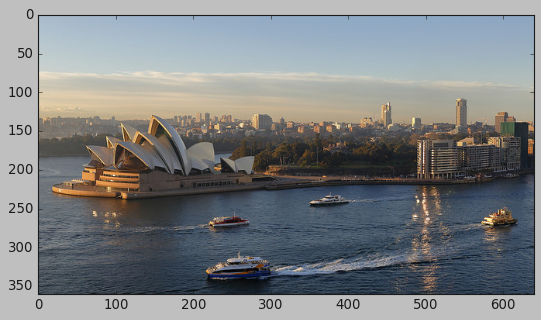

In [8]:
# display the array of pixels as an image
plt.imshow(data)
plt.show()

Running the example first loads the image and then reports the data type of the array, in this case, 8-bit unsigned integers, then reports the shape of the array, in this case, 360 pixels wide by 640 pixels high and three channels for red, green, and blue.

## Apply the SVD on images

In this example, we will use the SVD to extract the more important features from the image. 

It is nice to see the effect of the SVD on something very visual. The code is inspired/taken from this blog post.

Let’s start by loading an image in python and convert it to a Numpy array. 

We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

In [9]:
img = Image.open(location)

In [11]:
# convert image to grayscale
imggray = img.convert('LA')

In [12]:
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)

In [13]:
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

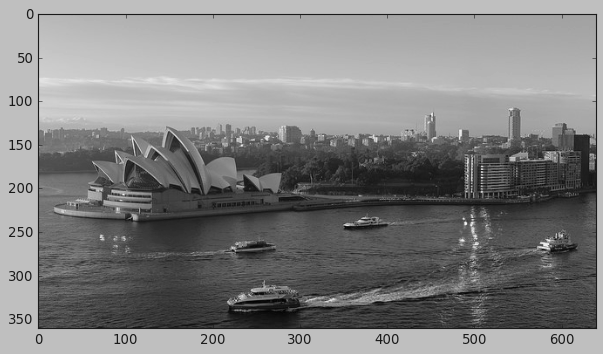

In [14]:
plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

In [15]:
U, D, V = np.linalg.svd(imgmat)

In [16]:
imgmat.shape

(360, 640)

In [17]:
U.shape, D.shape, V.shape

((360, 360), (360,), (640, 640))

D  are the singular values that need to be put into a diagonal matrix

The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. 

For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

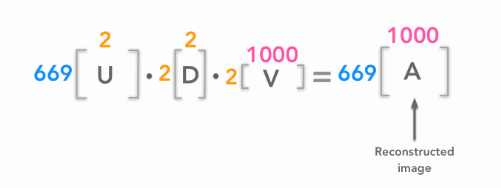

Reconstruct image usin 2 singular values.

In [19]:
reconstimg = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])

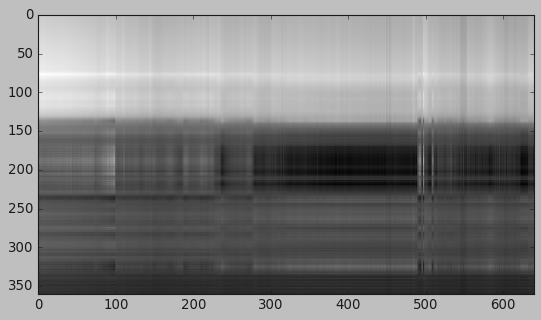

In [20]:
plt.imshow(reconstimg, cmap='gray')
plt.show()

hard to see image clearly with only 2 singular values and singular vectors. 

But we already see something!

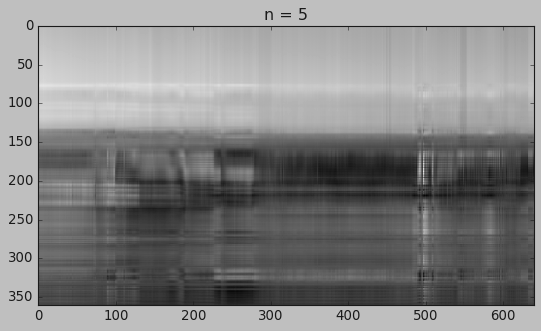

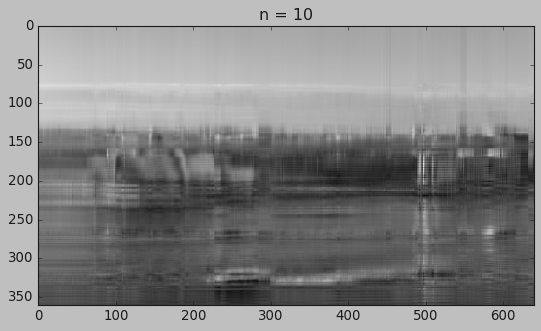

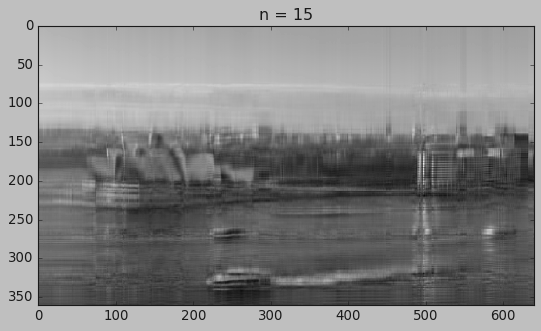

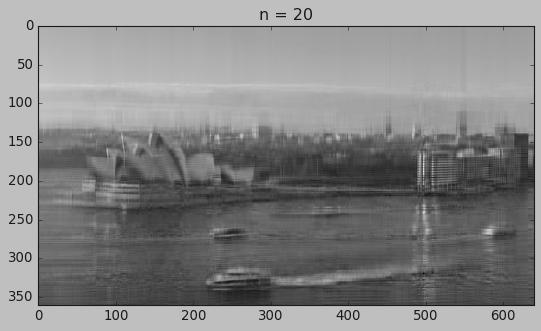

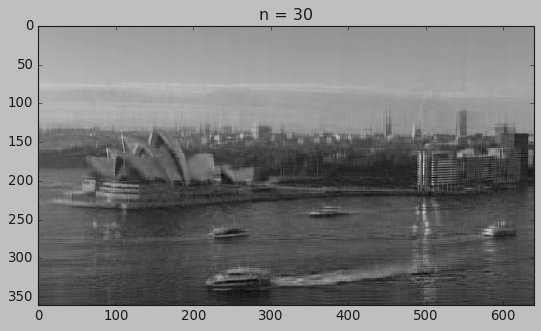

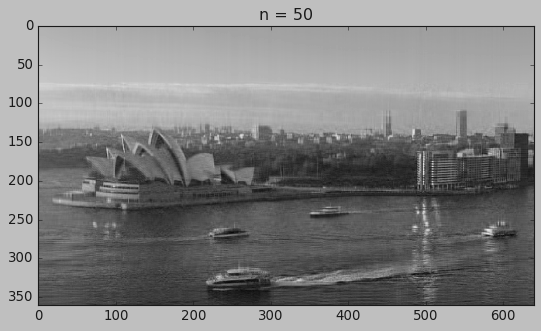

In [21]:
for i in [5, 10, 15, 20, 30, 50]:
    reconstimg = np.matrix(U[:, :i]) * np.diag(D[:i]) * np.matrix(V[:i, :])
    
    plt.imshow(reconstimg, cmap='gray')
    
    title = "n = %s" % i
    plt.title(title)
    plt.show()

In [31]:
# Save the compressed image
constructed_image_from_array = Image.fromarray(reconstimg)

constructed_color_image_from_array = constructed_image_from_array.convert("L")

In [34]:
with open(r'D:\AI-DATASETS\01-MISC\Sydney-Opera-House-reduced.jpg', 'w') as file:
    constructed_color_image_from_array.save(file)